__Batch- February Phase 2 OIB-SIP__ 

Internship-Data Science

RAJSHREE PRAJAPATI


__TASK 3__

__Problem Statement:__ 

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

__CAR PRICE PREDICTION__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
Data = pd.read_csv("car data.csv")

In [3]:
Data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
Data.shape

(301, 9)

In [5]:
Data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
Data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


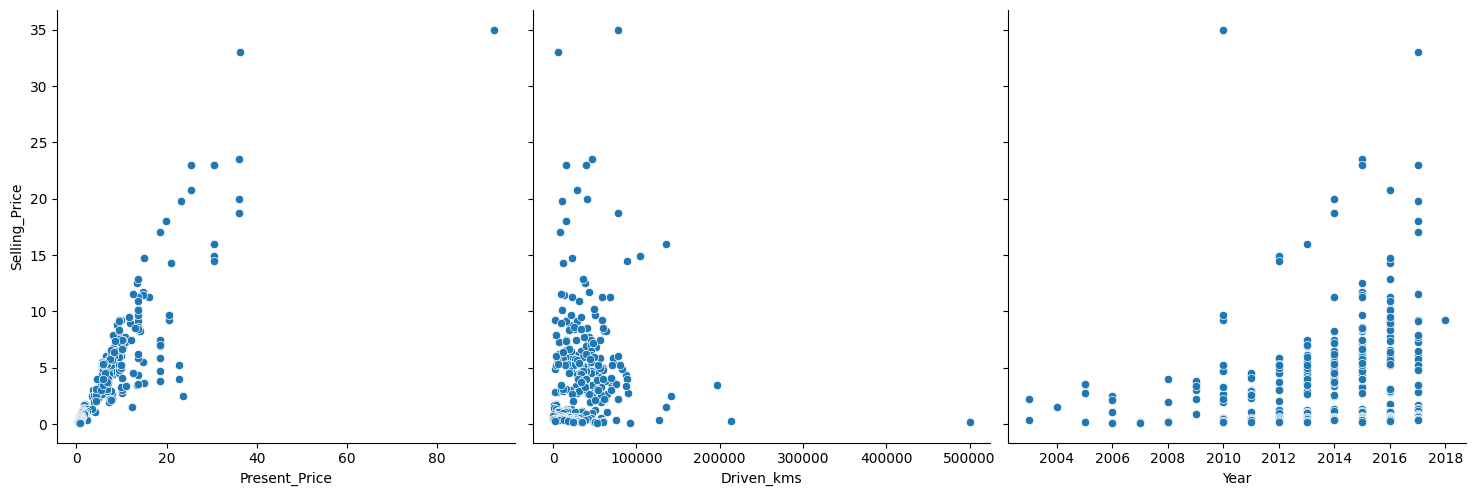

In [7]:
sns.pairplot(Data, x_vars=[ 'Present_Price', 'Driven_kms', 'Year' ], y_vars = 'Selling_Price', size = 5, kind = 'scatter' )
plt.show()

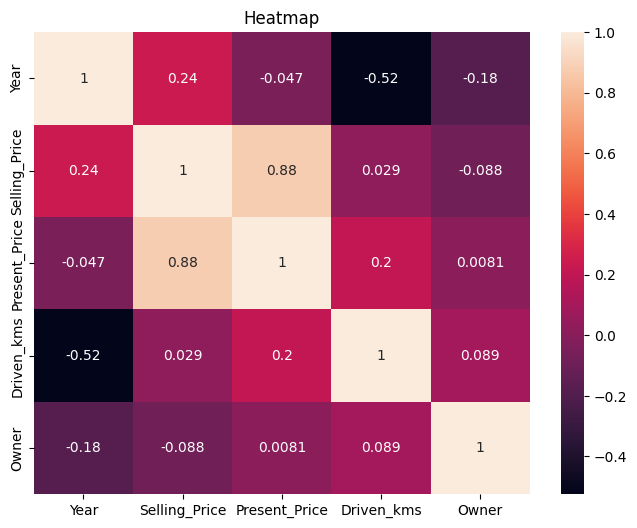

In [8]:
numeric_columns = Data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.title('Heatmap')
plt.show()

C:\Users\khush\AppData\Local\Temp\ipykernel_29412\2046090681.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Data['Year'], palette='tab20_r')


<Axes: xlabel='Year', ylabel='count'>

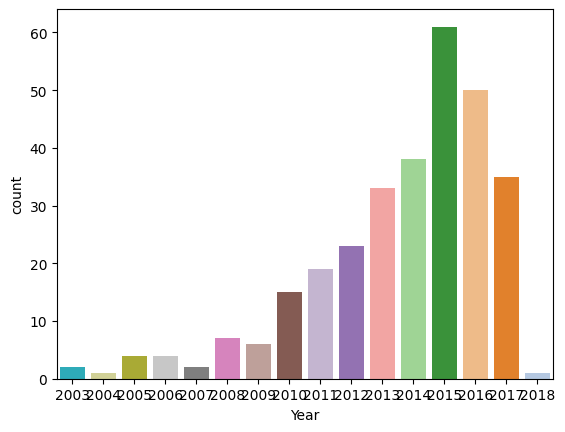

In [63]:
sns.countplot(x=Data['Year'], palette='tab20_r')

<Axes: xlabel='Selling_type', ylabel='count'>

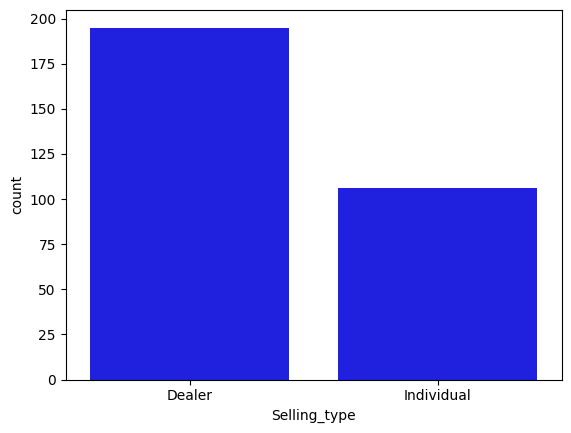

In [60]:
sns.countplot(x=Data['Selling_type'], color='blue')

<Axes: xlabel='Fuel_Type', ylabel='count'>

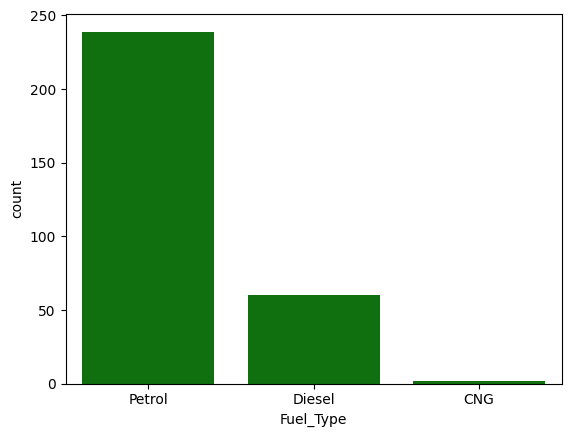

In [57]:
sns.countplot(x=Data['Fuel_Type'], color='green')

<Axes: xlabel='Transmission', ylabel='count'>

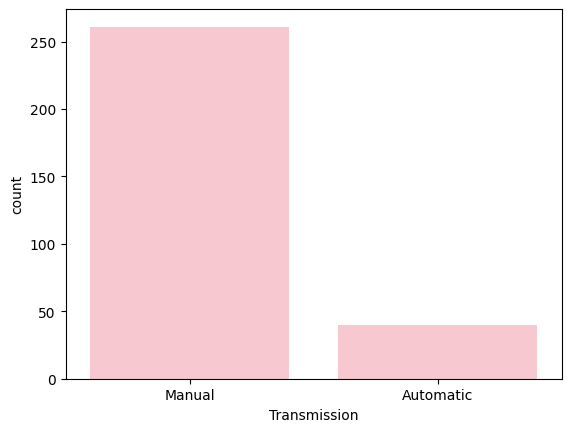

In [61]:
sns.countplot(x=Data['Transmission'], color='Pink')

In [9]:
features= Data.Present_Price
target= Data.Selling_Price

In [10]:
data= features.to_numpy()
tg= target.to_numpy()

In [11]:
data= data.reshape(-1,1)
tg= tg.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data, tg, train_size = 0.75, test_size = 0.25, random_state =  42)

__LINEAR REGRESSION MODEL__

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
Linear_Regression = LinearRegression()

In [15]:
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [16]:
m= Linear_Regression.coef_[0]
m

array([0.49793367])

In [17]:
c= Linear_Regression.intercept_
c

array([0.88706799])

In [18]:
y_pred_lin_train= Linear_Regression.predict(X_train)

In [19]:
y_pred_lin_test= Linear_Regression.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_lin_train=r2_score( y_train, y_pred_lin_train)
r2_score_lin_test=r2_score( y_test, y_pred_lin_test )
print( "MSE: ", mean_squared_error( y_test, y_pred_lin_test ) )
print("R-squared: ",r2_score_lin_train )
print( "R-squared: ",r2_score_lin_test )
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_lin_test )))

MSE:  6.601330645682937
R-squared:  0.7756441092327696
R-squared:  0.7597270983998041
RMSE:  2.569305479245887


__DECISION TREE MODEL__

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
Decision_T= DecisionTreeRegressor(criterion= 'absolute_error')

In [23]:
Decision_T.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error')

In [24]:
y_pred_dt_train= Decision_T.predict(X_train)

In [25]:
y_pred_dt_test= Decision_T.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_dt_train=r2_score( y_train, y_pred_dt_train)
r2_score_dt_test=r2_score( y_test, y_pred_dt_test )
print( "MSE: ", mean_squared_error( y_test, y_pred_dt_test ) )
print("R-squared(for train data): ",r2_score_dt_train) 
print( "R-squared(for test data): ", r2_score_dt_test)
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_dt_test )))

MSE:  4.6831736842105265
R-squared(for train data):  0.964954521312982
R-squared(for test data):  0.8295434980917349
RMSE:  2.164064158986634


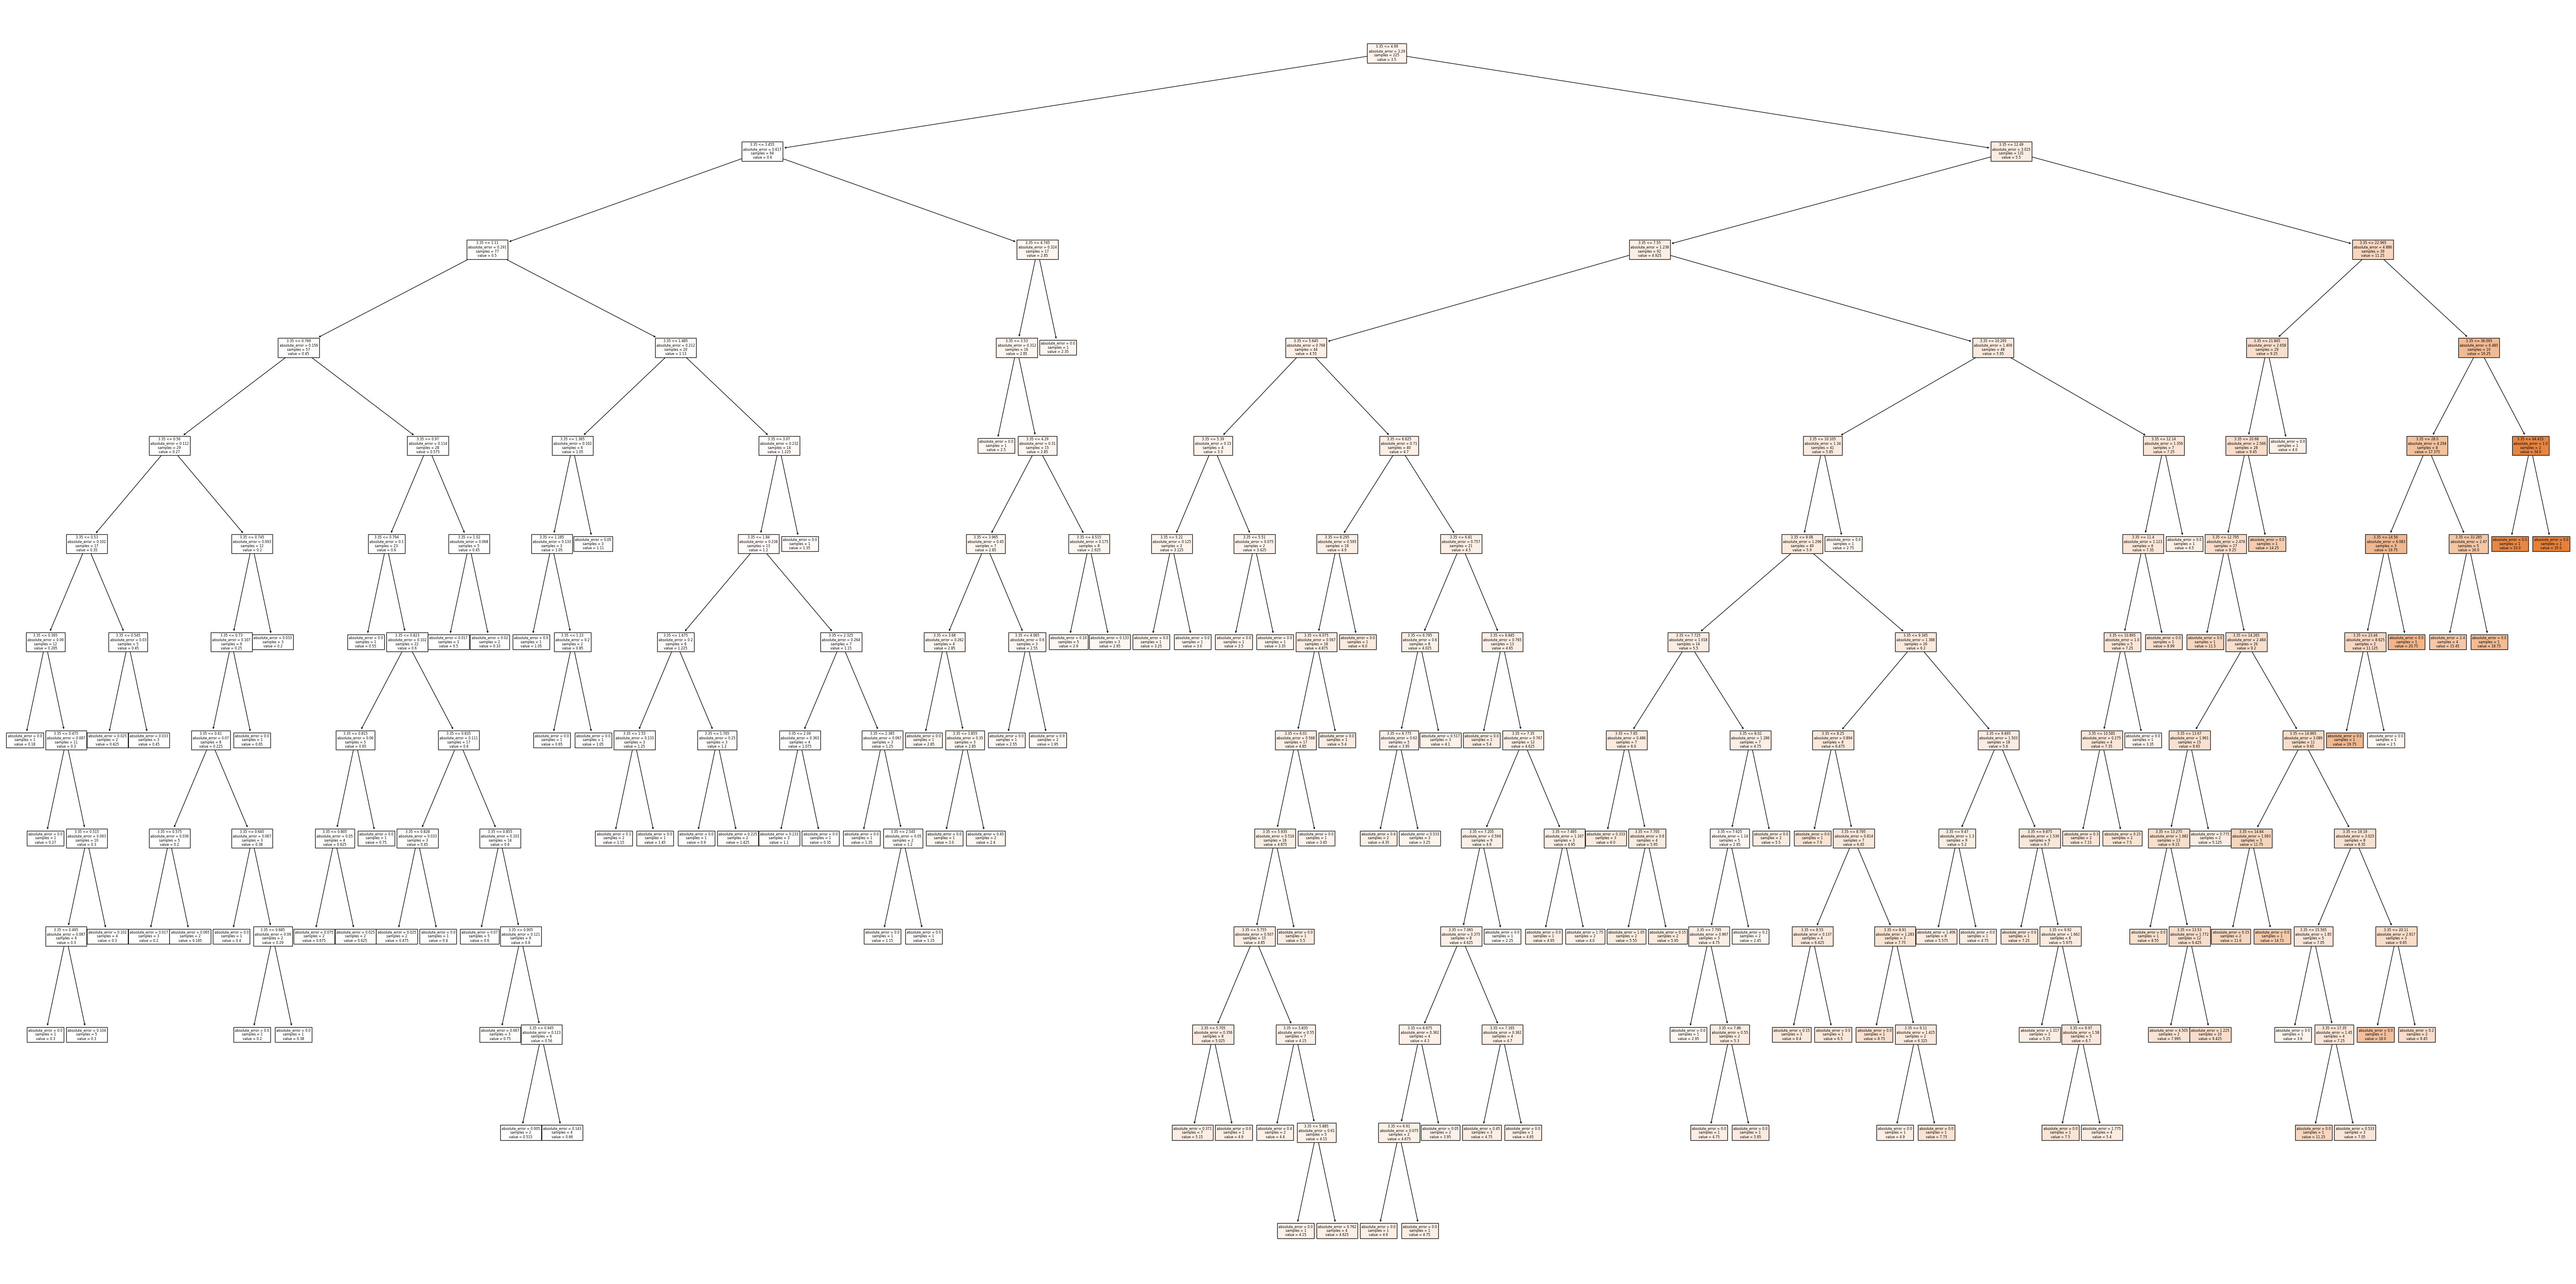

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(Decision_T, feature_names = Data.Selling_Price,class_names= Data.Present_Price,filled=True);

__RANDOM FOREST MODEL__

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
Random_F= RandomForestRegressor()

In [30]:
Random_F.fit(X_train, y_train)

C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [31]:
y_pred_rf_train= Random_F.predict(X_train)

In [32]:
y_pred_rf_test= Random_F.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_rf_train=r2_score( y_train, y_pred_rf_train)
r2_score_rf_test=r2_score( y_test, y_pred_rf_test )
print( "MSE: ", mean_squared_error( y_test, y_pred_rf_test ) )
print("R-squared(for train data): ",r2_score_rf_train) 
print( "R-squared(for test data): ",r2_score_rf_test )
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_rf_test )))

MSE:  4.627438102982389
R-squared(for train data):  0.9306333287997886
R-squared(for test data):  0.8315721420944127
RMSE:  2.15114808950532


__XGB REGRESSOR__

In [34]:
!pip install xgboost
import xgboost as xgb
xg_b= xgb.XGBRegressor()



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
xg_b.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred_xgb_train= xg_b.predict(X_train)

In [37]:
y_pred_xgb_test= xg_b.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_xgb_train= r2_score( y_train, y_pred_xgb_train)
r2_score_xgb_test= r2_score( y_test, y_pred_xgb_test ) 
print( "MSE: ", mean_squared_error( y_test, y_pred_xgb_test ) )
print("R-squared(for train data): ",r2_score_xgb_train) 
print( "R-squared(for test data): ",r2_score_xgb_test)
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_xgb_test )))

MSE:  6.037029143165914
R-squared(for train data):  0.9678729256396801
R-squared(for test data):  0.7802663452069285
RMSE:  2.4570366588974437


__ADABOOSTREGRESSOR__

In [39]:
from sklearn.ensemble import AdaBoostRegressor

In [40]:
ada_B = AdaBoostRegressor()

In [41]:
ada_B.fit(X_train,y_train)

C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [42]:
y_pred_ada_train= ada_B.predict(X_train)

In [43]:
y_pred_ada_test= ada_B.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_ada_train= r2_score( y_train, y_pred_ada_train)
r2_score_ada_test= r2_score( y_test, y_pred_ada_test )
print( "MSE: ", mean_squared_error( y_test, y_pred_ada_test ) )
print("R-squared(for train data): ",r2_score_ada_train) 
print( "R-squared(for test data): ",r2_score_ada_test )
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_ada_test )))

MSE:  4.582461046887056
R-squared(for train data):  0.8984237565275999
R-squared(for test data):  0.8332092010986496
RMSE:  2.140668364527083


In [45]:
Summery_Models = pd.DataFrame({ 'Model': ['Linear_Regressor', 'Decision_Tree_Regressor','Random_Forest_Regressor','XGBoost_Regressor','ADABoost_Regressor]'],
                       'r2_Score_train': [r2_score_lin_train, r2_score_dt_train, r2_score_rf_train, r2_score_xgb_train, r2_score_ada_train],
                       
                       'r2_Score_test': [r2_score_lin_test, r2_score_dt_test, r2_score_rf_test, r2_score_xgb_test, r2_score_ada_test]})
Summery_Models.sort_values(by = ['r2_Score_train', 'r2_Score_test'], ascending = False, ignore_index = True)

,Model,r2_Score_train,r2_Score_test
0,XGBoost_Regressor,0.967873,0.780266
1,Decision_Tree_Regressor,0.964955,0.829543
2,Random_Forest_Regressor,0.930633,0.831572
3,ADABoost_Regressor],0.898424,0.833209
4,Linear_Regressor,0.775644,0.759727


__HYPERPARAMETER TUNING__

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters= {'max_depth': [2,3,5,10,20], 
             'min_samples_leaf': [1,2,5,10,20], 
             'n_estimators': [30,50,100,200,300]}
grid_search= GridSearchCV( estimator= Random_F, param_grid= parameters, cv=4, n_jobs=-1, scoring='accuracy')


In [48]:
grid_search.fit(X_train, y_train)

C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10, 20],
                         'n_estimators': [30, 50, 100, 200, 300]},
             scoring='accuracy')

In [49]:
best_parameter= grid_search.best_params_
best_parameter

{'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 30}

In [50]:
Random_F= RandomForestRegressor(max_depth=2, min_samples_leaf= 1, n_estimators=30)

In [51]:
Random_F.fit(X_train, y_train)

C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=2, n_estimators=30)

In [52]:
y_pred_randomf_train= Random_F.predict(X_train)
y_pred_randomf_test= Random_F.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score_randomf_train=r2_score( y_train, y_pred_randomf_train)
r2_score_randomf_test=r2_score( y_test, y_pred_randomf_test )
print( "MSE: ", mean_squared_error( y_test, y_pred_randomf_test ) )
print("R-squared(for train data): ",r2_score_randomf_train) 
print( "R-squared(for test data): ",r2_score_randomf_test )
print("RMSE: ", np.sqrt( mean_squared_error( y_test, y_pred_randomf_test )))

MSE:  5.740788757382752
R-squared(for train data):  0.8353484125382402
R-squared(for test data):  0.7910487981522041
RMSE:  2.395994314972962


__The hyperparameter tuned Random Forest Model yielded a R2 score of 0.78 for the test data.
Thank You!__